In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

print(os.listdir('/content/drive/ Mobility/data'))


['16 2017-03-01 matrix2_res.csv', 'combined_all_data.csv', 'cleaned_combined_data.csv', 'hen_contact_graph.gexf']


In [ ]:
data_path = '/content/drive/MyDrive/Hens Mobility/d

In [ ]:
data_path

'/content/drive/MyDrive/Hens Mobility/data/16 2017-03-01 matrix2_res.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(data_path)

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,time,time_,date
0,CA0000001804,CA0000001317,89,P3:EE:H3:A7,1488407108,1488407588,1488408160,1488407676,1.488408e+09,2017-03-01 12:33:53,2017-03-01
1,CA0000001804,CA0000002125,104,P3:EE:H3:A7,1488407108,1488407961,1488408160,1488408064,1.488408e+09,2017-03-01 12:37:03.25,2017-03-01
2,CA0000001599,CA0000002125,3,P3:EE:H3:A7,1488408062,1488407961,1488408185,1488408064,1.488408e+09,2017-03-01 12:41:08,2017-03-01
3,CA0000001599,CA0000001804,99,P3:EE:H3:A7,1488408062,1488407108,1488408185,1488408160,1.488408e+09,2017-03-01 12:37:58.75,2017-03-01
4,CA0000001317,CA0000001599,7,P3:EE:H3:A7,1488408179,1488408062,1488408500,1488408185,1.488408e+09,2017-03-01 12:43:51.5,2017-03-01
...,...,...,...,...,...,...,...,...,...,...,...
108513,CA0000001394,CA0000001384,150,P3:EB:H1:A3,1488425909,1488422918,1488428127,1488426058,1.488426e+09,2017-03-01 17:35:53,2017-03-01
108514,CA0000001394,CA0000001870,398,P3:EB:H1:A3,1488425909,1488425829,1488428127,1488426306,1.488427e+09,2017-03-01 17:49:02.75,2017-03-01
108515,CA0000001394,CA0000001549,440,P3:EB:H1:A3,1488425909,1488424428,1488428127,1488426348,1.488426e+09,2017-03-01 17:43:23,2017-03-01
108516,CA0000001394,CA0000001984,320,P3:EB:H1:A3,1488425909,1488426354,1488428127,1488426673,1.488427e+09,2017-03-01 17:52:45.75,2017-03-01


In [ ]:
df.isna().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
time,0
time_,0


In [ ]:
l = set(df['V1']) & set(df['V2'])

In [ ]:
len(l)

558

In [ ]:
import re

def clean_fractional_seconds(ts):
    return re.sub(r'(\.\d+)', '', ts)

df['time_clean'] = df['time_'].astype(str).apply(clean_fractional_seconds)

df['time_clean'] = pd.to_datetime(df['time_clean'], errors='coerce')
df['time_only'] = df['time_clean'].dt.strftime('%H:%M:%S')

print(df[['time_', 'time_clean', 'time_only']].head(10))


                    time_          time_clean time_only
0     2017-03-01 12:33:53 2017-03-01 12:33:53  12:33:53
1  2017-03-01 12:37:03.25 2017-03-01 12:37:03  12:37:03
2     2017-03-01 12:41:08 2017-03-01 12:41:08  12:41:08
3  2017-03-01 12:37:58.75 2017-03-01 12:37:58  12:37:58
4   2017-03-01 12:43:51.5 2017-03-01 12:43:51  12:43:51
5  2017-03-01 13:12:50.25 2017-03-01 13:12:50  13:12:50
6     2017-03-01 13:15:31 2017-03-01 13:15:31  13:15:31
7     2017-03-01 13:17:15 2017-03-01 13:17:15  13:17:15
8  2017-03-01 13:19:55.75 2017-03-01 13:19:55  13:19:55
9  2017-03-01 13:27:04.75 2017-03-01 13:27:04  13:27:04


In [ ]:
df.drop(columns=['time_clean','time_'], inplace=True)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,time,date,time_only
0,CA0000001804,CA0000001317,89,P3:EE:H3:A7,1488407108,1488407588,1488408160,1488407676,1.488408e+09,2017-03-01,12:33:53
1,CA0000001804,CA0000002125,104,P3:EE:H3:A7,1488407108,1488407961,1488408160,1488408064,1.488408e+09,2017-03-01,12:37:03
2,CA0000001599,CA0000002125,3,P3:EE:H3:A7,1488408062,1488407961,1488408185,1488408064,1.488408e+09,2017-03-01,12:41:08
3,CA0000001599,CA0000001804,99,P3:EE:H3:A7,1488408062,1488407108,1488408185,1488408160,1.488408e+09,2017-03-01,12:37:58
4,CA0000001317,CA0000001599,7,P3:EE:H3:A7,1488408179,1488408062,1488408500,1488408185,1.488408e+09,2017-03-01,12:43:51
...,...,...,...,...,...,...,...,...,...,...,...
108513,CA0000001394,CA0000001384,150,P3:EB:H1:A3,1488425909,1488422918,1488428127,1488426058,1.488426e+09,2017-03-01,17:35:53
108514,CA0000001394,CA0000001870,398,P3:EB:H1:A3,1488425909,1488425829,1488428127,1488426306,1.488427e+09,2017-03-01,17:49:02
108515,CA0000001394,CA0000001549,440,P3:EB:H1:A3,1488425909,1488424428,1488428127,1488426348,1.488426e+09,2017-03-01,17:43:23
108516,CA0000001394,CA0000001984,320,P3:EB:H1:A3,1488425909,1488426354,1488428127,1488426673,1.488427e+09,2017-03-01,17:52:45


In [ ]:
df['time_only'] = pd.to_datetime(df['time_only'], format='%H:%M:%S', errors='coerce').dt.time

df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time_only'].astype(str), errors='coerce')

# 1. Total number of interactions (rows)
total_interactions = len(df)

# 2. Number of unique hens (from V1 and V2 combined)
unique_hens = pd.unique(df[['V1', 'V2']].values.ravel())
num_unique_hens = len(unique_hens)

# 3. Number of unique hen pairs (unordered pairs)
df['pair'] = df.apply(lambda row: frozenset([row['V1'], row['V2']]), axis=1)
unique_pairs = df['pair'].nunique()

# 4. Contact duration stats (V3)
avg_duration = df['V3'].mean()
median_duration = df['V3'].median()
max_duration = df['V3'].max()
min_duration = df['V3'].min()

# 5. Time range of the data (using combined datetime)
start_time = df['datetime'].min()
end_time = df['datetime'].max()

# Print results
print("=== General Interaction Stats ===")
print(f"Total interactions: {total_interactions}")
print(f"Unique hens: {num_unique_hens}")
print(f"Unique hen pairs: {unique_pairs}")
print(f"Contact duration (seconds): avg={avg_duration:.2f}, median={median_duration}, max={max_duration}, min={min_duration}")
print(f"Time range: {start_time} to {end_time}")


=== General Interaction Stats ===
Total interactions: 108518
Unique hens: 558
Unique hen pairs: 44766
Contact duration (seconds): avg=585.96, median=200.0, max=34467, min=1
Time range: 2017-03-01 12:24:00 to 2017-03-02 07:31:08


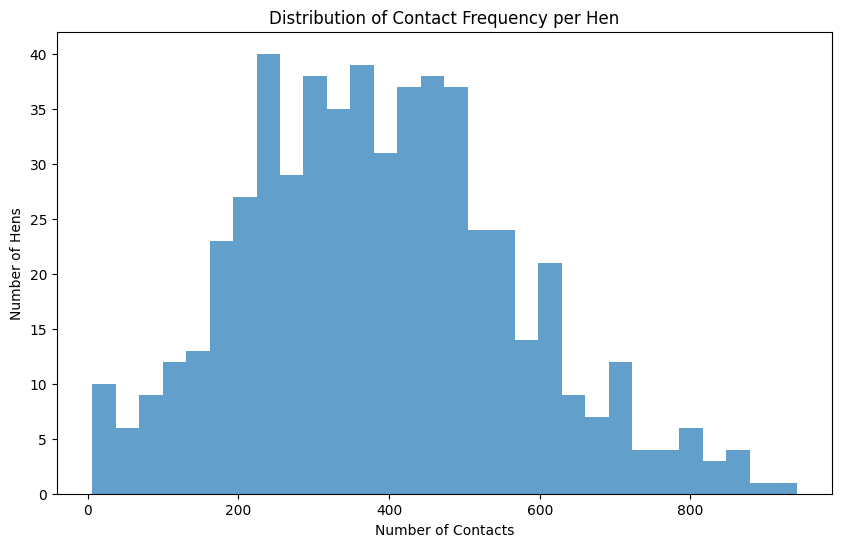

=== Hen-Level Analysis ===
Number of contacts per hen (top 5):
CA0000001864    941
CA0000001792    890
CA0000001687    878
CA0000001252    875
CA0000001519    866
Name: count, dtype: int64

Total contact duration per hen (top 5):
CA0000001873    755535
CA0000001252    742325
CA0000001687    660665
CA0000001853    606452
CA0000001593    579595
Name: V3, dtype: int64

Average contact duration per hen (top 5):
CA0000001094    11851.704762
CA0000001083     3889.050936
CA0000000698     3354.968864
CA0000001311     2587.357937
CA0000002030     2250.509947
Name: V3, dtype: float64

Most social hens (highest degree centrality):
CA0000002461    300
CA0000001765    281
CA0000000699    271
CA0000001441    264
CA0000001777    264
dtype: int64

Least social hens (lowest degree centrality):
CA0000001332    22
CA0000000824    20
CA0000000943    15
CA0000001694    15
CA0000000973     5
dtype: int64


In [ ]:

all_hens = pd.concat([df['V1'], df['V2']])

# 1. Number of contacts per hen
contacts_per_hen = all_hens.value_counts()

# 2. Total and average duration of contact per hen
duration_per_hen = pd.concat([
    df.groupby('V1')['V3'].sum(),
    df.groupby('V2')['V3'].sum()
]).groupby(level=0).sum()

average_duration_per_hen = pd.concat([
    df.groupby('V1')['V3'].mean(),
    df.groupby('V2')['V3'].mean()
]).groupby(level=0).mean()

from collections import defaultdict

neighbors = defaultdict(set)
for _, row in df.iterrows():
    neighbors[row['V1']].add(row['V2'])
    neighbors[row['V2']].add(row['V1'])

degree_centrality = {hen: len(nbs) for hen, nbs in neighbors.items()}

degree_centrality_series = pd.Series(degree_centrality).sort_values(ascending=False)

most_social_hens = degree_centrality_series.head()
least_social_hens = degree_centrality_series.tail()

# 4. Distribution of contact frequency across hens (contacts_per_hen)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
contacts_per_hen.plot(kind='hist', bins=30, alpha=0.7)
plt.title('Distribution of Contact Frequency per Hen')
plt.xlabel('Number of Contacts')
plt.ylabel('Number of Hens')
plt.show()

# Print summaries
print("=== Hen-Level Analysis ===")
print("Number of contacts per hen (top 5):")
print(contacts_per_hen.head())

print("\nTotal contact duration per hen (top 5):")
print(duration_per_hen.sort_values(ascending=False).head())

print("\nAverage contact duration per hen (top 5):")
print(average_duration_per_hen.sort_values(ascending=False).head())

print("\nMost social hens (highest degree centrality):")
print(most_social_hens)

print("\nLeast social hens (lowest degree centrality):")
print(least_social_hens)


=== Pair-Level Analysis ===

Pair(s) with longest total contact time:
pair
(CA0000001252, CA0000002070)    42781
Name: V3, dtype: int64

Pair(s) with most frequent interactions:
pair
(CA0000001571, CA0000002216)    35
dtype: int64


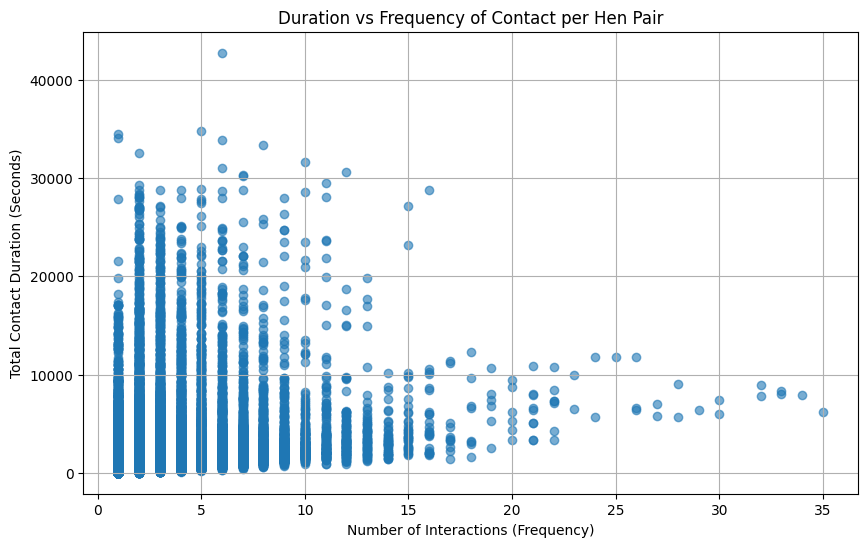

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Normalize pairs so that (A,B) and (B,A) are treated the same
df['pair'] = df.apply(lambda row: tuple(sorted([row['V1'], row['V2']])), axis=1)

# 2. Aggregate total contact duration per pair
total_duration_per_pair = df.groupby('pair')['V3'].sum()

# 3. Aggregate interaction frequency per pair
frequency_per_pair = df.groupby('pair').size()

# 4. Identify pair(s) with longest total contact time
longest_duration_pairs = total_duration_per_pair[total_duration_per_pair == total_duration_per_pair.max()]

# 5. Identify pair(s) with most frequent interactions
most_frequent_pairs = frequency_per_pair[frequency_per_pair == frequency_per_pair.max()]

# Print results
print("=== Pair-Level Analysis ===")
print("\nPair(s) with longest total contact time:")
print(longest_duration_pairs)

print("\nPair(s) with most frequent interactions:")
print(most_frequent_pairs)

# 6. Duration vs frequency scatter plot
plt.figure(figsize=(10,6))
plt.scatter(frequency_per_pair, total_duration_per_pair, alpha=0.6)
plt.xlabel('Number of Interactions (Frequency)')
plt.ylabel('Total Contact Duration (Seconds)')
plt.title('Duration vs Frequency of Contact per Hen Pair')
plt.grid(True)
plt.show()



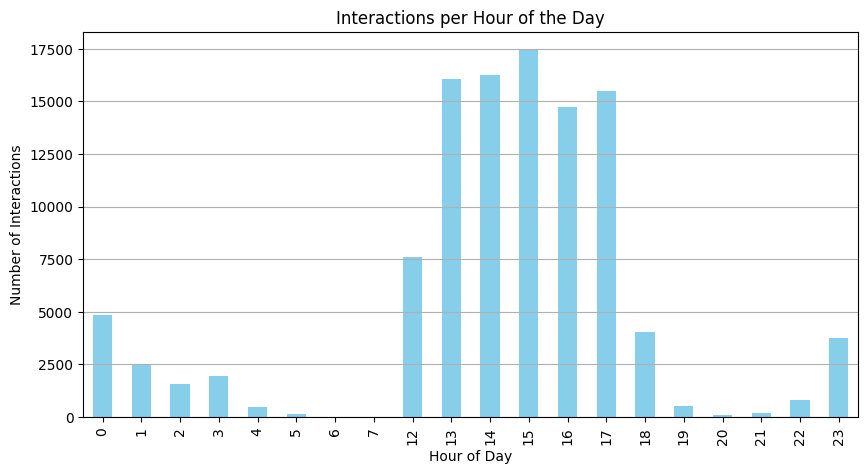

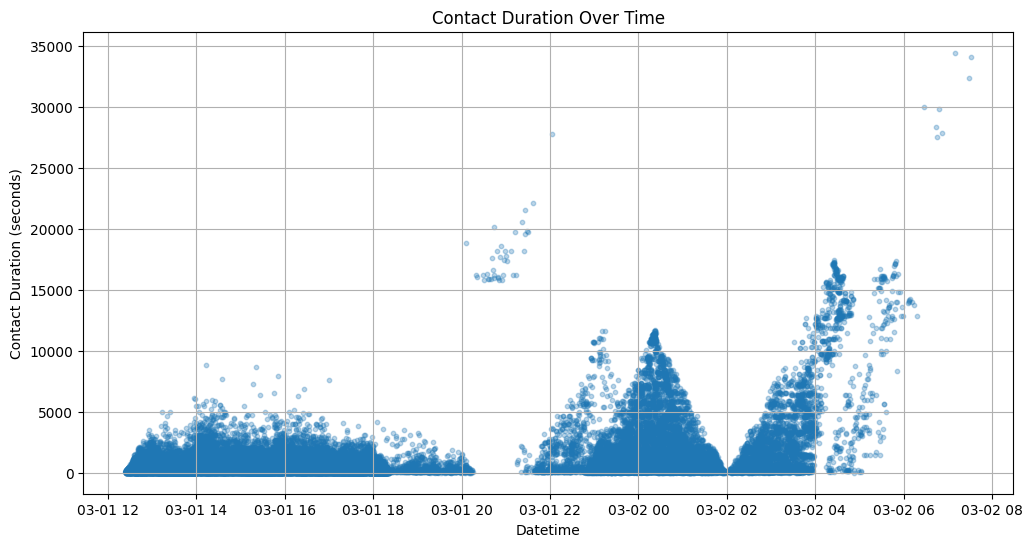

<ipython-input-29-4003562627>:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  interactions_over_time = df.set_index('datetime').resample('H').size()


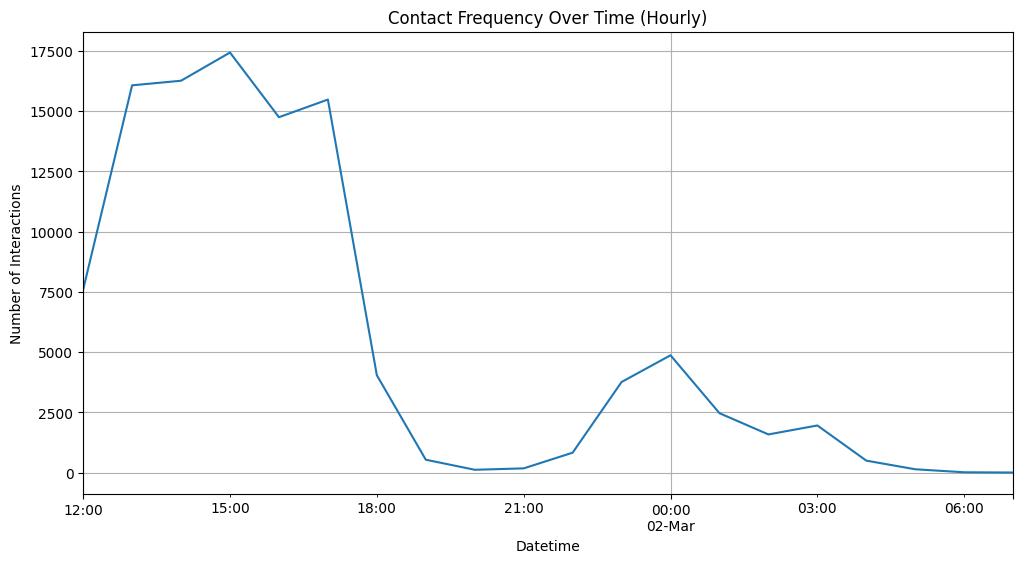

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time_only'].astype(str))

# Extract hour of day
df['hour'] = df['datetime'].dt.hour

interactions_per_hour = df.groupby('hour').size()

plt.figure(figsize=(10,5))
interactions_per_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Interactions')
plt.title('Interactions per Hour of the Day')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12,6))
plt.scatter(df['datetime'], df['V3'], alpha=0.3, s=10)
plt.xlabel('Datetime')
plt.ylabel('Contact Duration (seconds)')
plt.title('Contact Duration Over Time')
plt.grid(True)
plt.show()

interactions_over_time = df.set_index('datetime').resample('H').size()

plt.figure(figsize=(12,6))
interactions_over_time.plot()
plt.xlabel('Datetime')
plt.ylabel('Number of Interactions')
plt.title('Contact Frequency Over Time (Hourly)')
plt.grid(True)
plt.show()

Most Active Antennas (by number of contacts):
V4
P3:EE:H4:A11    11134
P3:EE:H3:A2     10801
P3:EE:H3:A8      7830
P3:EB:H2:A11     7519
P3:EE:H3:A1      7429
P3:EB:H1:A8      6549
P3:EB:H1:A2      6257
P3:EB:H1:A1      6190
P3:EB:H1:A5      5752
P3:EB:H2:A12     5428
Name: count, dtype: int64


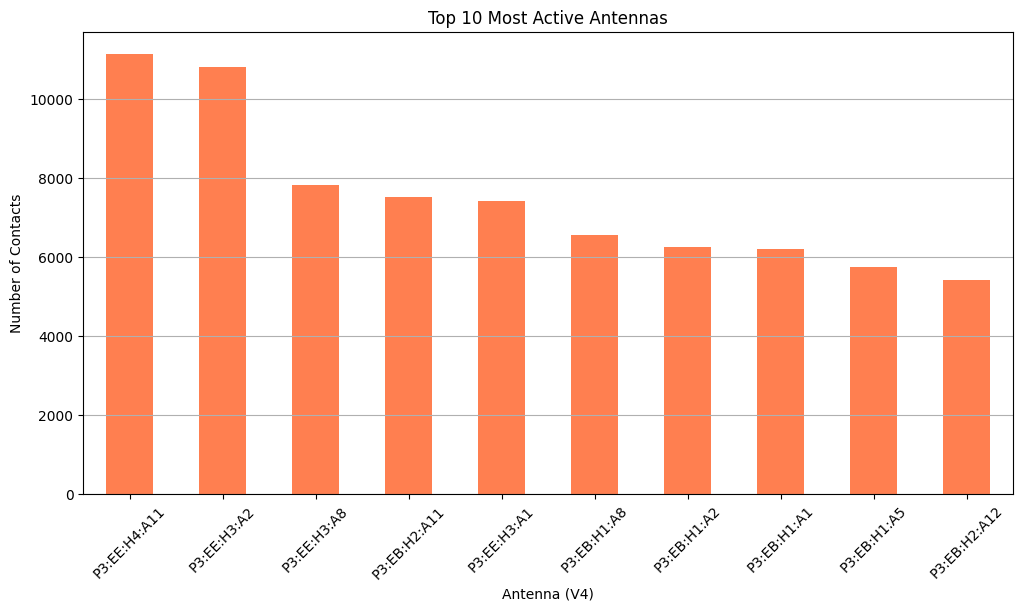

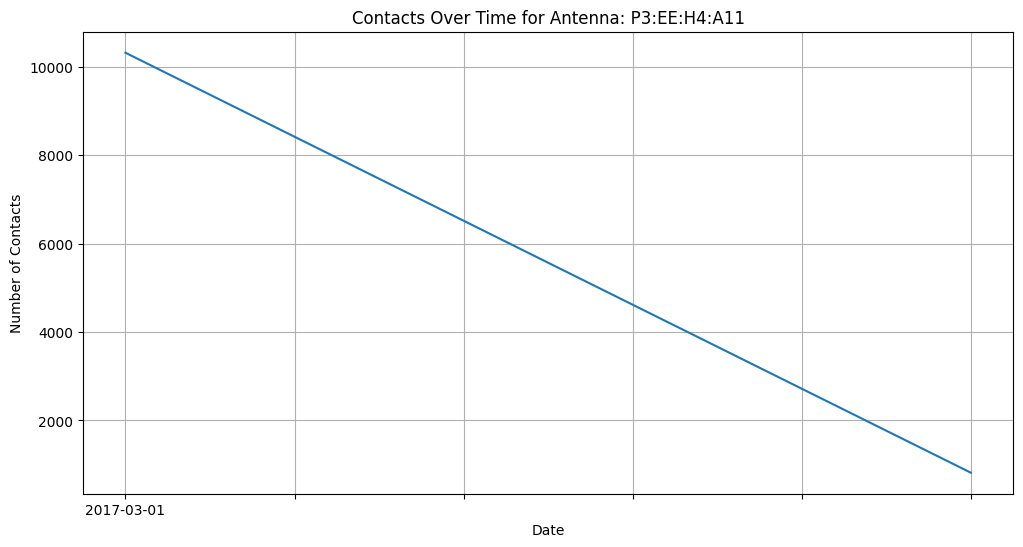

Average Contact Duration by Antenna:
V4
P3:EB:H1:A7     2666.520325
P3:EB:H1:A6     1681.992063
P3:EE:H4:A10    1186.602230
P3:EE:H4:A12    1129.598418
P3:EE:H3:A6      990.765330
P3:EB:H2:A10     936.282609
P3:EB:H1:A1      930.608239
P3:EE:H3:A3      907.741433
P3:EB:H1:A3      784.675439
P3:EE:H4:A11     752.440273
Name: V3, dtype: float64


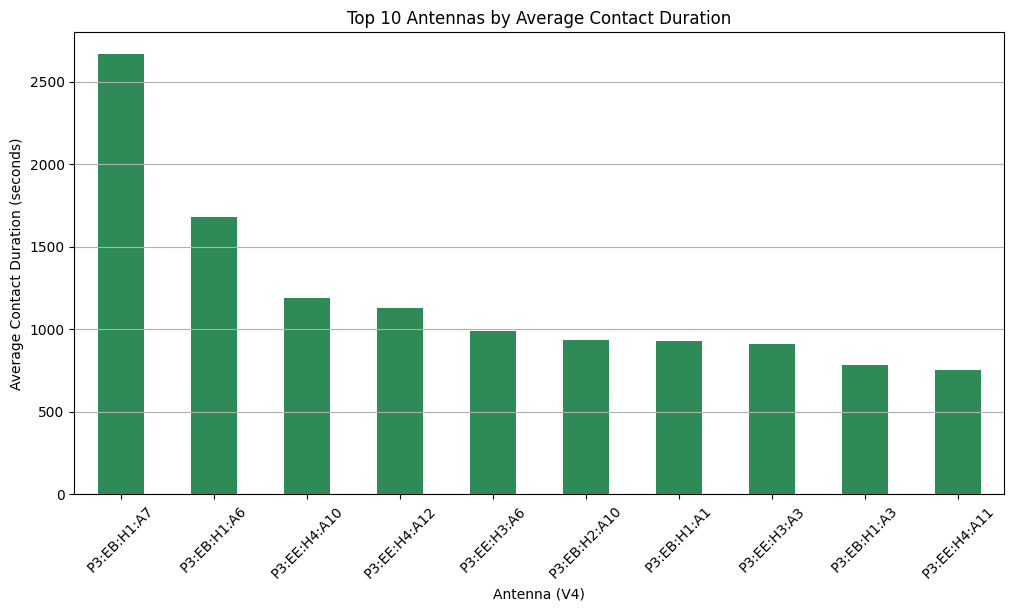

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and columns as you described

# 1. Most active antennas (based on number of contacts)
antenna_activity = df['V4'].value_counts()

print("Most Active Antennas (by number of contacts):")
print(antenna_activity.head(10))

# Plot top 10 most active antennas
plt.figure(figsize=(12,6))
antenna_activity.head(10).plot(kind='bar', color='coral')
plt.xlabel('Antenna (V4)')
plt.ylabel('Number of Contacts')
plt.title('Top 10 Most Active Antennas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


contacts_per_location_date = df.groupby(['date', 'V4']).size().unstack(fill_value=0)

top_antenna = antenna_activity.index[0]
contacts_per_location_date[top_antenna].plot(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Number of Contacts')
plt.title(f'Contacts Over Time for Antenna: {top_antenna}')
plt.grid(True)
plt.show()

duration_by_location = df.groupby('V4')['V3'].mean().sort_values(ascending=False)

print("Average Contact Duration by Antenna:")
print(duration_by_location.head(10))

plt.figure(figsize=(12,6))
duration_by_location.head(10).plot(kind='bar', color='seagreen')
plt.xlabel('Antenna (V4)')
plt.ylabel('Average Contact Duration (seconds)')
plt.title('Top 10 Antennas by Average Contact Duration')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



<ipython-input-31-50417232>:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(communities))


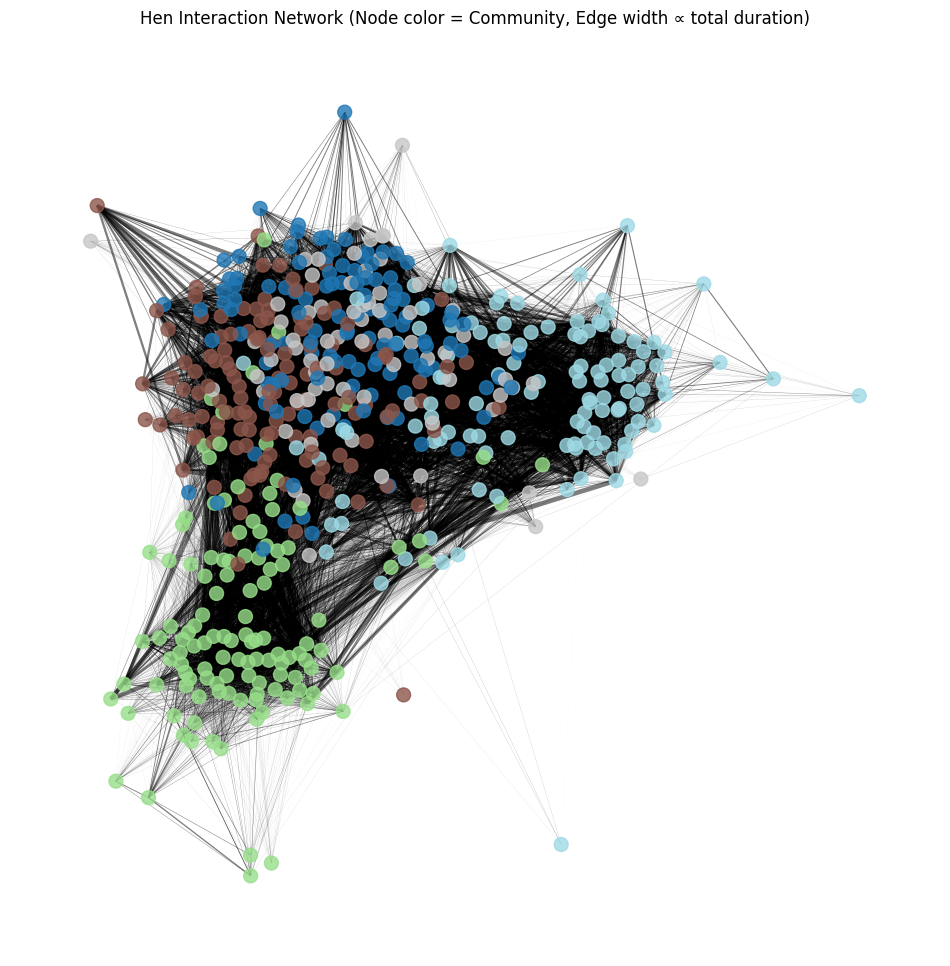

Number of hens (nodes): 558
Number of edges (pairs): 44766
Number of communities detected: 5


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
df['pair'] = df.apply(lambda row: tuple(sorted([row['V1'], row['V2']])), axis=1)

# Aggregate interaction counts and total duration by pair
edge_data = df.groupby('pair').agg(
    interaction_count=('V3', 'count'),  # number of interactions
    total_duration=('V3', 'sum')         # sum of durations
).reset_index()

# 2. Build undirected graph
G = nx.Graph()

# Add edges with attributes
for _, row in edge_data.iterrows():
    hen1, hen2 = row['pair']
    G.add_edge(hen1, hen2, interaction_count=row['interaction_count'], total_duration=row['total_duration'])

# 3. Add nodes explicitly if needed (nodes appear automatically when edges are added)

# 4. Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='total_duration')  # weighted by duration
closeness_centrality = nx.closeness_centrality(G, distance=None)  # unweighted closeness (or use 'total_duration' as distance)

# Add centralities as node attributes
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

# 5. Community detection using Louvain method
partition = community_louvain.best_partition(G, weight='total_duration')

# Add community info as node attribute
nx.set_node_attributes(G, partition, 'community')

# 6. Visualization (simple matplotlib plot)
plt.figure(figsize=(12, 12))

# Position nodes using spring layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Color nodes by community
communities = set(partition.values())
colors = plt.cm.get_cmap('tab20', len(communities))
node_colors = [colors(partition[node]) for node in G.nodes()]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.8)

# Draw edges weighted by total duration (scaled thickness)
edges = G.edges(data=True)
weights = [edge_attr['total_duration'] / max(edge_data['total_duration']) * 5 for _, _, edge_attr in edges]
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5)

# Optional: draw labels (comment out if graph is big)
# nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Hen Interaction Network (Node color = Community, Edge width ∝ total duration)")
plt.axis('off')
plt.show()

# 7. Print summary stats
print("Number of hens (nodes):", G.number_of_nodes())
print("Number of edges (pairs):", G.number_of_edges())
print("Number of communities detected:", len(set(partition.values())))


<ipython-input-32-1677435919>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(communities))


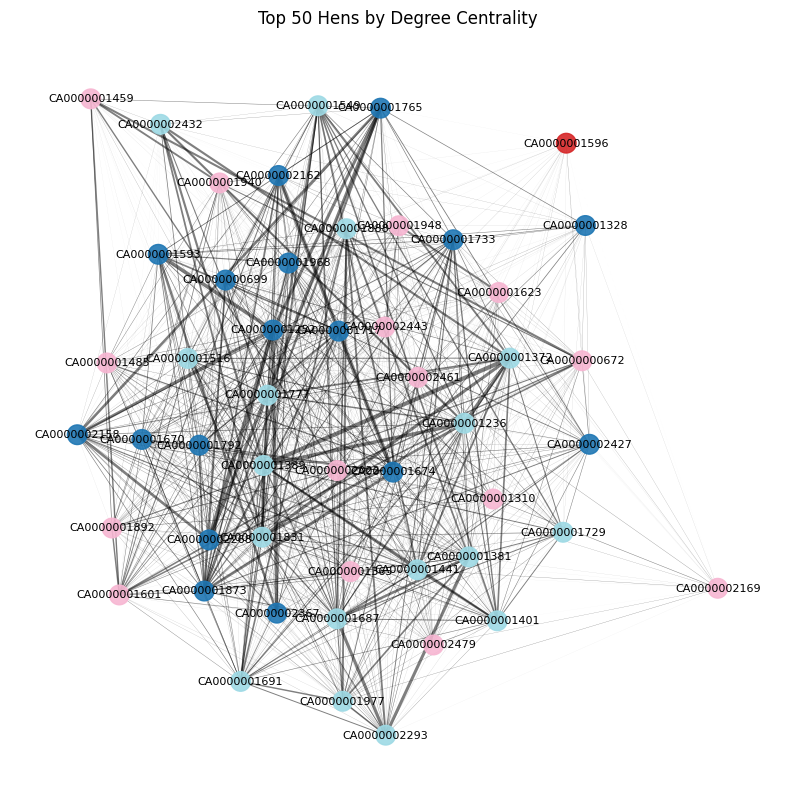

In [ ]:
import matplotlib.pyplot as plt

# Sort nodes by degree centrality, pick top 50
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:50]

# Induce subgraph
subG = G.subgraph(top_nodes)

pos = nx.spring_layout(subG, k=0.3, iterations=30)
plt.figure(figsize=(10,10))

# Get community colors from original partition
sub_partition = {n: partition[n] for n in subG.nodes()}
communities = set(sub_partition.values())
colors = plt.cm.get_cmap('tab20', len(communities))
node_colors = [colors(sub_partition[n]) for n in subG.nodes()]

# Draw nodes and edges
nx.draw_networkx_nodes(subG, pos, node_size=200, node_color=node_colors, alpha=0.9)
edges = subG.edges(data=True)
weights = [edge_attr['total_duration'] / max(edge_data['total_duration']) * 5 for _, _, edge_attr in edges]
nx.draw_networkx_edges(subG, pos, width=weights, alpha=0.5)

nx.draw_networkx_labels(subG, pos, font_size=8)
plt.title("Top 50 Hens by Degree Centrality")
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


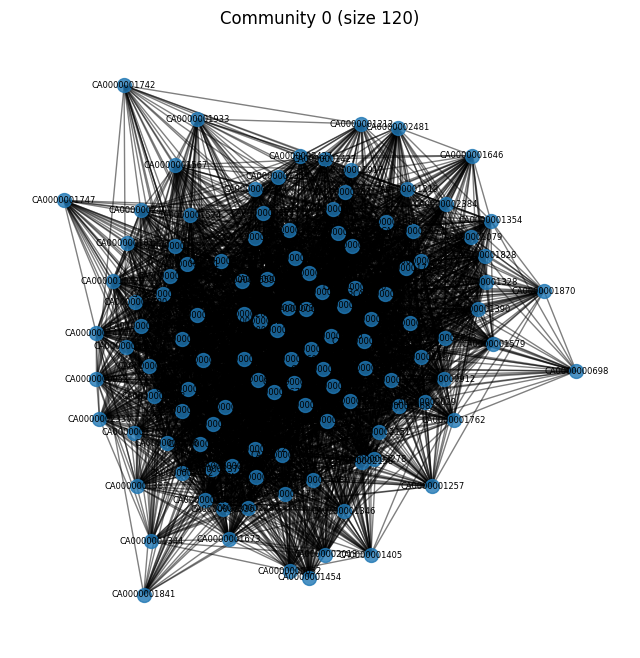

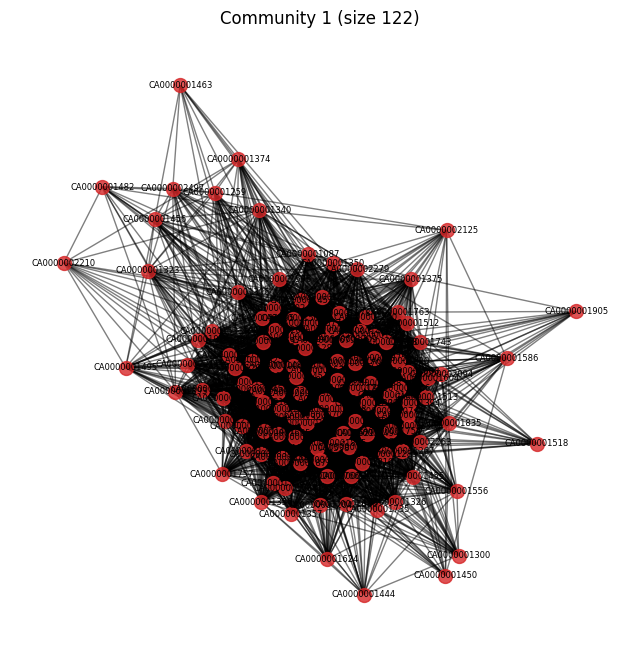

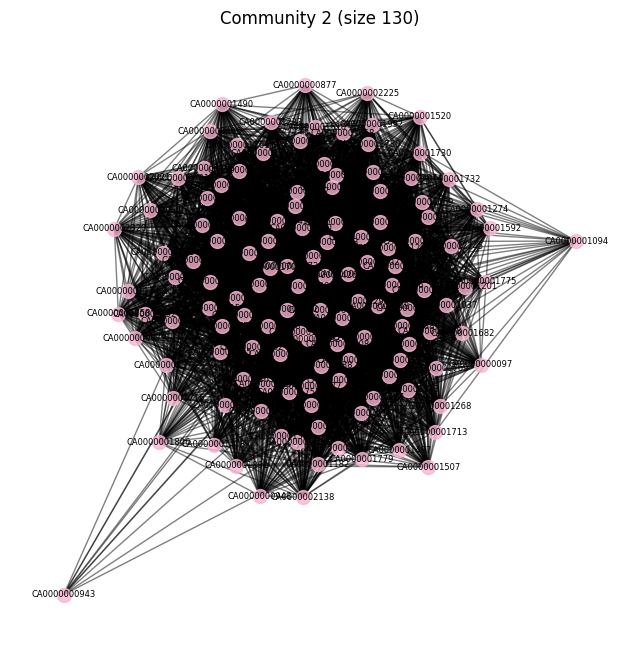

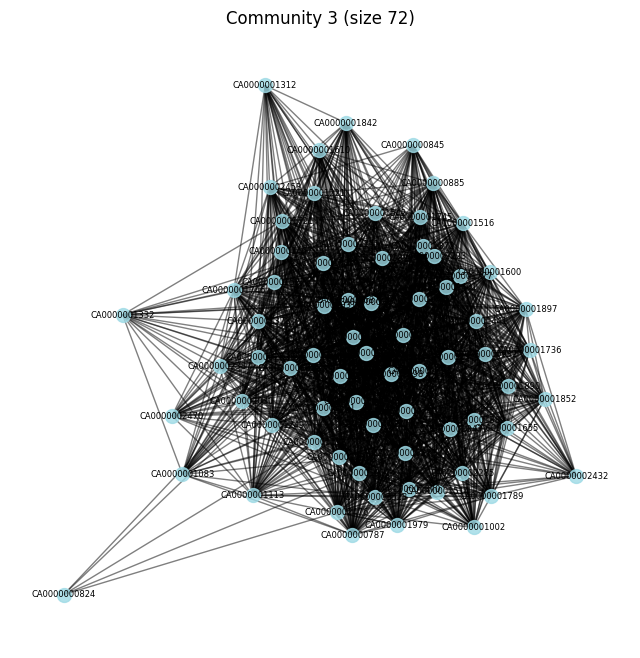

In [ ]:
for comm in communities:
    nodes_comm = [n for n, c in partition.items() if c == comm]
    subG_comm = G.subgraph(nodes_comm)
    pos = nx.spring_layout(subG_comm, k=0.3, iterations=30)

    plt.figure(figsize=(8,8))
    nx.draw_networkx_nodes(subG_comm, pos, node_size=100, node_color=colors(comm), alpha=0.8)
    nx.draw_networkx_edges(subG_comm, pos, alpha=0.5)
    nx.draw_networkx_labels(subG_comm, pos, font_size=6)
    plt.title(f"Community {comm} (size {len(nodes_comm)})")
    plt.axis('off')
    plt.show()


In [ ]:
pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.7 MB/s eta 0:00:00


In [ ]:
from pyvis.network import Network

net = Network(height="750px", width="100%", notebook=True)
net.from_nx(G)

for node in net.nodes:
    node['color'] = plt.cm.tab20(partition[node['id']] % 20)

net.show("hen_network.html")


hen_network.html


In [ ]:
threshold = edge_data['total_duration'].quantile(0.75)  # top 25% duration edges

# Create graph with only edges above threshold
filtered_edges = [(u,v,d) for u,v,d in G.edges(data=True) if d['total_duration'] >= threshold]
H = nx.Graph()
H.add_edges_from(filtered_edges)

# Add isolated nodes as well
H.add_nodes_from(G.nodes())

# Plot H similarly to above


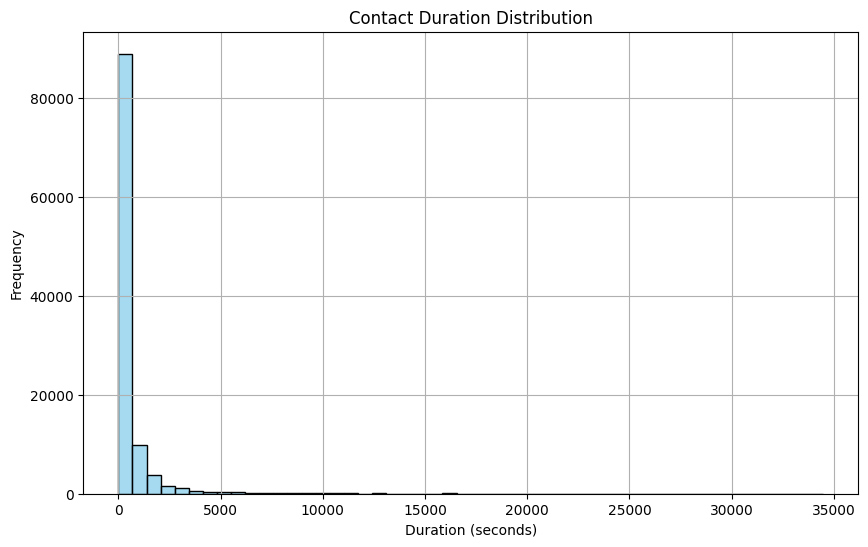

Duration stats:
count    108518.000000
mean        585.955464
std        1391.438351
min           1.000000
25%          96.000000
50%         200.000000
75%         483.000000
max       34467.000000
Name: V3, dtype: float64

Number of outliers above 95th percentile (2199.149999999994 seconds): 5426
               V1            V2    V3
77   CA0000001265  CA0000001537  4021
93   CA0000001317  CA0000001537  2810
102  CA0000001501  CA0000001537  3085
103  CA0000001501  CA0000001317  3074
113  CA0000001407  CA0000001501  2445


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic histogram with seaborn for nice styling
plt.figure(figsize=(10,6))
sns.histplot(df['V3'], bins=50, kde=False, color='skyblue')

plt.title('Contact Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Optional: summary statistics for quick insights
print("Duration stats:")
print(df['V3'].describe())

# To check outliers - show very large durations (e.g., above 95th percentile)
threshold = df['V3'].quantile(0.95)
outliers = df[df['V3'] > threshold]

print(f"\nNumber of outliers above 95th percentile ({threshold} seconds): {len(outliers)}")
print(outliers[['V1', 'V2', 'V3']].head())


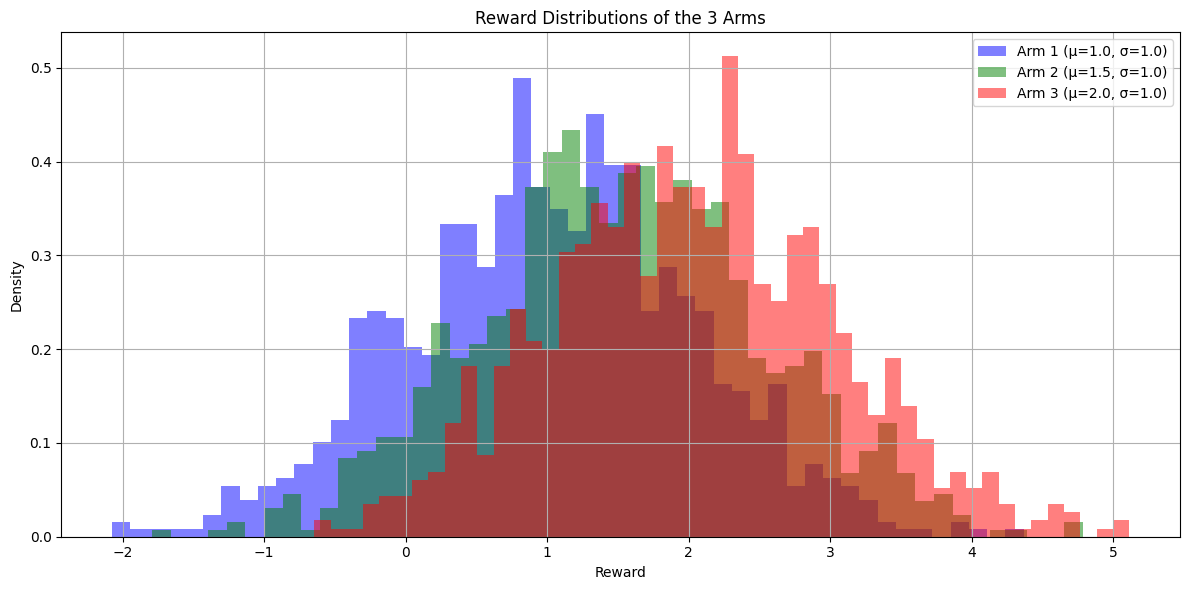

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for each arm (mean, standard deviation)
arms = {
    "Arm 1": (1.0, 1.0),
    "Arm 2": (1.5, 1.0),
    "Arm 3": (2.0, 1.0)
}

# Generate samples
samples = {arm: np.random.normal(loc=mean, scale=std, size=1000) for arm, (mean, std) in arms.items()}

# Plotting using matplotlib histograms
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red']

for i, arm in enumerate(samples):
    plt.hist(samples[arm], bins=50, alpha=0.5, color=colors[i],
             label=f"{arm} (μ={arms[arm][0]}, σ={arms[arm][1]})", density=True)

plt.title("Reward Distributions of the 3 Arms")
plt.xlabel("Reward")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
